In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
plt.style.use('ggplot')

In [81]:
PATH_AIHWKIT = '/scratch/msc24h18/msc_project/results/test32/'
PATH_NEUROSIM = '/scratch/msc24h18/msc_project/results/test33/'
FIGURES_PATH = '/scratch/msc24h18/msc_project/results/report_figures/'

In [82]:
# get neurosim averag performance per device and pluse width
df_neurosim_1 = pd.read_csv(PATH_NEUROSIM + 'run_1.csv')
df_neurosim_2 = pd.read_csv(PATH_NEUROSIM + 'run_2.csv')

# Merge the dataframes and get average accuracy
df_neurosim = df_neurosim_1
df_neurosim['accuracy_2'] = df_neurosim_2['accuracy']
df_neurosim['accuracy'] = df_neurosim[['accuracy', 'accuracy_2']].mean(axis=1)
df_neurosim.drop(columns=['accuracy_2'], inplace=True)
df_neurosim = df_neurosim[['device_id', 'pulseWidth', 'accuracy']]

# get aihwkit data
df_aihwkit = pd.read_csv(PATH_AIHWKIT + 'no_out_scaling_wnstd_0.3.csv')
df_aihwkit = df_aihwkit[['device_id', 'pulseWidth', 'val_acc']]
df_aihwkit.rename(columns={'val_acc': 'accuracy'}, inplace=True)

print(df_neurosim.head())
print(df_aihwkit.head())

         device_id  pulseWidth  accuracy
0  ID180XR1000Star      0.0005    12.600
1          ID294YR      0.0005    60.185
2          ID294YR      0.0005    21.740
3          ID294YR      0.0005    21.600
4          ID294YR      0.0005    20.620
         device_id  pulseWidth  accuracy
0  ID180XR1000Star      0.0005  0.954917
1          ID294YR      0.0005  0.966250
2          ID294YR      0.0005  0.951333
3          ID294YR      0.0005  0.945417
4          ID294YR      0.0005  0.946250


In [83]:
def plot_relative_accuracy(df_merged, savefig=None, **kwargs):
    fig, ax = plt.subplots(figsize=(4, 8))
    ax2 = ax.twinx()

    df_merged = df_merged.sort_values(by=['device_id'])
    unique_ids = df_merged['device_id'].unique()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_ids)))
    #colors = [plt.cm.tab20c(i) for i in range(len(unique_ids))]
    color_map = dict(zip(unique_ids, colors))
    for i, row in df_merged.iterrows():
        coordsNeurosim = (1, row['rel_accuracy_neurosim'])
        coordsAihwkit = (2, row['rel_accuracy_aihwkit'])
        ax.plot(coordsNeurosim[0], coordsNeurosim[1], 'o', color=color_map[row['device_id']], label=row['device_id'])
        ax2.plot(coordsAihwkit[0], coordsAihwkit[1], 'o', color=color_map[row['device_id']])
        conn = ConnectionPatch(coordsNeurosim, coordsAihwkit, 'data', 'data', axesA=ax, axesB=ax2, color=color_map[row['device_id']], lw=1)
        ax.add_artist(conn)

    ax.grid(False)
    ax2.grid(False)

    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Neurosim', 'Aihwkit'])

    ax.set(xlim=(0.9, 2.1), **kwargs)
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='center right', bbox_to_anchor=(1.8, 0.5))
    if savefig:
        plt.savefig(savefig, bbox_inches='tight')
    plt.show()

/tmp/ipykernel_2064974/322322106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neurosim['rel_accuracy'] = df_neurosim['accuracy'] / df_neurosim['accuracy'].max()


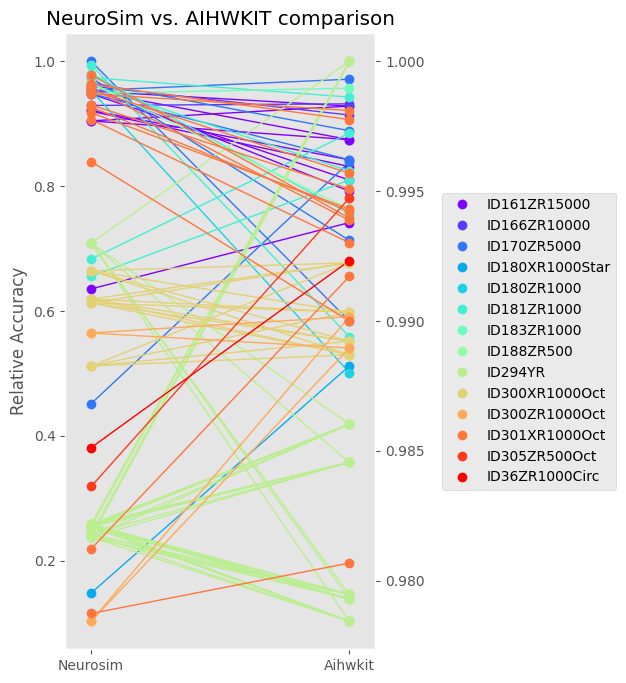

In [84]:
df_neurosim['rel_accuracy'] = df_neurosim['accuracy'] / df_neurosim['accuracy'].max()
df_aihwkit['rel_accuracy'] = df_aihwkit['accuracy'] / df_aihwkit['accuracy'].max()

df_merged = pd.merge(df_neurosim, df_aihwkit, on=['device_id', 'pulseWidth'], suffixes=('_neurosim', '_aihwkit'))

#print(df_merged)

plot_relative_accuracy(df_merged, ylabel='Relative Accuracy', title="NeuroSim vs. AIHWKIT comparison", savefig=FIGURES_PATH+'relative_accuracy.png')

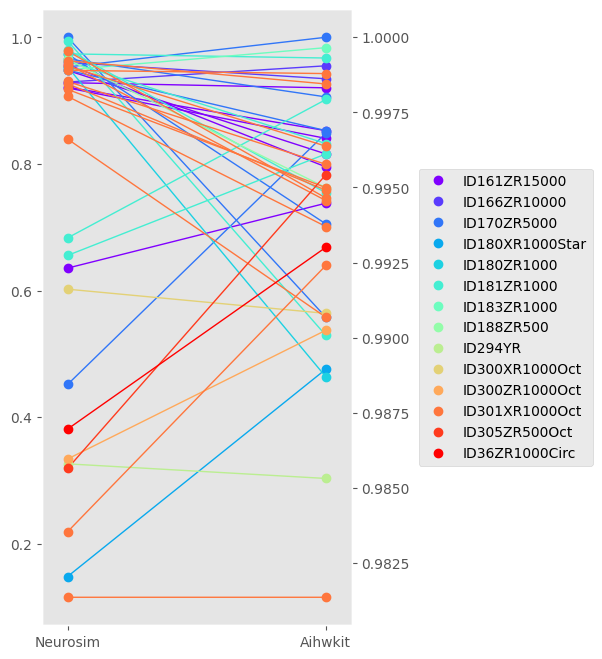

In [85]:
# for each dataframe, merge all sets of device_id+pulseWidth together
df_merged = df_merged.groupby(['device_id', 'pulseWidth'], as_index=False).agg({'accuracy_neurosim': 'mean', 'accuracy_aihwkit': 'mean'})

df_merged['rel_accuracy_neurosim'] = df_merged['accuracy_neurosim'] / df_merged['accuracy_neurosim'].max()
df_merged['rel_accuracy_aihwkit'] = df_merged['accuracy_aihwkit'] / df_merged['accuracy_aihwkit'].max()

plot_relative_accuracy(df_merged)

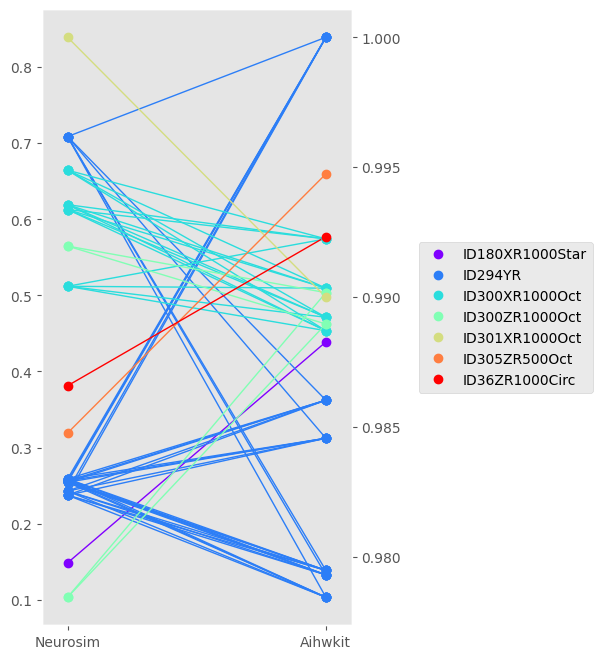

In [86]:
# plot relative accuracy of both (only for pulswidth=0.0005)

df_neurosim_pw0 = df_neurosim[df_neurosim['pulseWidth'] == 0.0005]
df_aihwkit_pw0 = df_aihwkit[df_aihwkit['pulseWidth'] == 0.0005]

df_merged_pw0 = pd.merge(df_neurosim_pw0, df_aihwkit_pw0, on='device_id', suffixes=('_neurosim', '_aihwkit'))
plot_relative_accuracy(df_merged_pw0)

